In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/student_info.csv')

In [9]:
df.info()
df.head(5)
df.dtypes
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   gender            1000 non-null   object 
 3   age               1000 non-null   int64  
 4   grade_level       1000 non-null   int64  
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   attendance_rate   1000 non-null   float64
 9   parent_education  1000 non-null   object 
 10  study_hours       1000 non-null   float64
 11  internet_access   1000 non-null   object 
 12  lunch_type        1000 non-null   object 
 13  extra_activities  1000 non-null   object 
 14  final_result      1000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 117.3+ KB


(1000, 15)

In [8]:
df['final_result'].value_counts()

,count
final_result,
Pass,517
Fail,483


In [10]:
df.isnull().sum()

,0
student_id,0
name,0
gender,0
age,0
grade_level,0
math_score,0
reading_score,0
writing_score,0
attendance_rate,0
parent_education,0


In [11]:
for col in ['math_score', 'reading_score', 'writing_score', 'attendance_rate', 'study_hours']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col} -> {len(outliers)} outliers")

math_score -> 0 outliers
reading_score -> 0 outliers
writing_score -> 0 outliers
attendance_rate -> 0 outliers
study_hours -> 0 outliers


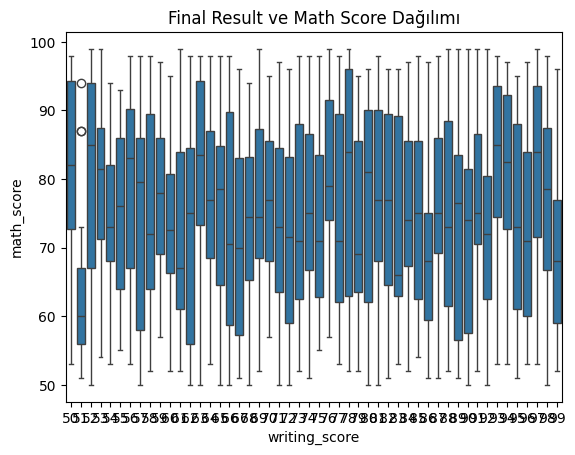

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='writing_score', y='math_score', data=df)
plt.title('Final Result ve Math Score Dağılımı')
plt.show()

In [14]:
df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

In [15]:
df['success_level'] = pd.cut(df['average_score'],
                             bins=[0, 60, 70, 85, 100],
                             labels=['Zayıf', 'Orta', 'İyi', 'Çok İyi'])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df[['math_score', 'reading_score', 'writing_score', 'attendance_rate', 'study_hours']]
y = df['final_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fail       0.43      0.27      0.33        94
        Pass       0.51      0.69      0.59       106

    accuracy                           0.49       200
   macro avg       0.47      0.48      0.46       200
weighted avg       0.48      0.49      0.47       200



In [20]:
df_bachelor = df[df['parent_education'].str.contains('Bachelor')]
df_bachelor

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result,average_score,success_level
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass,86.666667,Çok İyi
6,S7,Student_7,Other,16,9,76,66,88,97.967729,Bachelor's,2.372107,Yes,Free or reduced,No,Pass,76.666667,İyi
9,S10,Student_10,Other,17,11,62,95,96,80.216222,Bachelor's,1.716656,Yes,Standard,Yes,Fail,84.333333,İyi
17,S18,Student_18,Female,15,12,59,93,83,84.293918,Bachelor's,2.127300,No,Standard,Yes,Fail,78.333333,İyi
23,S24,Student_24,Female,15,10,74,82,60,90.645838,Bachelor's,2.870882,No,Free or reduced,Yes,Pass,72.000000,İyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,S989,Student_989,Male,16,9,57,77,95,99.737919,Bachelor's,4.406149,No,Free or reduced,Yes,Fail,76.333333,İyi
992,S993,Student_993,Female,17,11,86,78,70,99.842713,Bachelor's,3.003506,No,Standard,Yes,Pass,78.000000,İyi
994,S995,Student_995,Female,15,12,68,76,54,81.947338,Bachelor's,1.389507,No,Standard,No,Fail,66.000000,Orta
995,S996,Student_996,Female,15,10,76,75,55,94.127440,Bachelor's,2.212263,Yes,Free or reduced,No,Fail,68.666667,Orta


In [22]:
df[(df['age'] > 15) & (df['math_score'] >= 40)]

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result,average_score,success_level
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail,75.000000,İyi
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass,86.666667,Çok İyi
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail,72.666667,İyi
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass,75.666667,İyi
5,S6,Student_6,Male,17,11,61,54,89,93.140610,Master's,4.759697,No,Free or reduced,Yes,Fail,68.000000,Orta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,S993,Student_993,Female,17,11,86,78,70,99.842713,Bachelor's,3.003506,No,Standard,Yes,Pass,78.000000,İyi
996,S997,Student_997,Female,17,12,83,68,98,86.911592,Bachelor's,3.552898,No,Free or reduced,Yes,Fail,83.000000,İyi
997,S998,Student_998,Other,16,10,60,77,92,80.139645,PhD,2.400027,No,Free or reduced,No,Pass,76.333333,İyi
998,S999,Student_999,Other,17,9,94,66,97,88.069619,PhD,4.713490,No,Free or reduced,Yes,Pass,85.666667,Çok İyi


In [26]:
df_teenagers = df[(df['age'] >= 15) & (df['age'] <= 18)]

df_teenagers

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result,average_score,success_level
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail,75.000000,İyi
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass,86.666667,Çok İyi
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail,72.666667,İyi
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass,75.666667,İyi
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass,85.333333,Çok İyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S996,Student_996,Female,15,10,76,75,55,94.127440,Bachelor's,2.212263,Yes,Free or reduced,No,Fail,68.666667,Orta
996,S997,Student_997,Female,17,12,83,68,98,86.911592,Bachelor's,3.552898,No,Free or reduced,Yes,Fail,83.000000,İyi
997,S998,Student_998,Other,16,10,60,77,92,80.139645,PhD,2.400027,No,Free or reduced,No,Pass,76.333333,İyi
998,S999,Student_999,Other,17,9,94,66,97,88.069619,PhD,4.713490,No,Free or reduced,Yes,Pass,85.666667,Çok İyi


In [27]:
df[df['math_score'] == df['math_score'].max()]

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result,average_score,success_level
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass,86.666667,Çok İyi
27,S28,Student_28,Other,16,9,99,76,97,85.927152,Master's,4.134006,Yes,Free or reduced,No,Fail,90.666667,Çok İyi
72,S73,Student_73,Female,17,9,99,51,53,93.128192,High School,3.150161,No,Standard,No,Pass,67.666667,Orta
218,S219,Student_219,Male,17,10,99,92,88,84.222519,Bachelor's,4.007193,Yes,Standard,No,Pass,93.000000,Çok İyi
247,S248,Student_248,Other,16,10,99,92,78,88.226079,Bachelor's,4.337299,Yes,Free or reduced,Yes,Fail,89.666667,Çok İyi
291,S292,Student_292,Male,17,9,99,58,52,97.311248,High School,4.722689,Yes,Free or reduced,No,Pass,69.666667,Orta
326,S327,Student_327,Male,15,11,99,96,78,80.557045,Bachelor's,3.861289,Yes,Free or reduced,Yes,Pass,91.000000,Çok İyi
402,S403,Student_403,Other,16,9,99,83,69,99.911378,PhD,1.133694,No,Free or reduced,No,Pass,83.666667,İyi
435,S436,Student_436,Female,15,10,99,57,76,81.720643,Bachelor's,3.626251,Yes,Standard,Yes,Fail,77.333333,İyi
485,S486,Student_486,Female,15,10,99,93,92,87.094571,Bachelor's,2.751060,No,Free or reduced,Yes,Fail,94.666667,Çok İyi


In [28]:
df.nlargest(5, 'average_score')

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result,average_score,success_level
960,S961,Student_961,Male,15,12,98,98,93,98.576159,Bachelor's,1.697994,Yes,Free or reduced,No,Fail,96.333333,Çok İyi
451,S452,Student_452,Male,17,11,95,95,98,91.662604,Bachelor's,1.521282,No,Standard,Yes,Fail,96.000000,Çok İyi
485,S486,Student_486,Female,15,10,99,93,92,87.094571,Bachelor's,2.751060,No,Free or reduced,Yes,Fail,94.666667,Çok İyi
488,S489,Student_489,Other,15,10,93,93,97,97.665472,High School,4.744706,No,Free or reduced,No,Pass,94.333333,Çok İyi
546,S547,Student_547,Male,17,12,96,93,92,90.325666,High School,2.986974,Yes,Free or reduced,No,Pass,93.666667,Çok İyi


In [31]:
len(df[(df['math_score'] > 85) & (df['final_result'] == 'Pass')])

165

In [32]:
df_surprise = df[(df['math_score'] > 85) &
                 (df['extra_activities'] == 'Yes') &
                 (df['final_result'] == 'Fail')]
print(df_surprise)

    student_id         name  gender  age  grade_level  math_score  \
20         S21   Student_21    Male   17           11          89   
50         S51   Student_51  Female   16           10          95   
104       S105  Student_105   Other   15           10          89   
109       S110  Student_110  Female   15           10          92   
113       S114  Student_114   Other   17           11          95   
..         ...          ...     ...  ...          ...         ...   
941       S942  Student_942  Female   16            9          94   
952       S953  Student_953    Male   16           12          94   
956       S957  Student_957  Female   16           11          91   
959       S960  Student_960    Male   17           11          94   
974       S975  Student_975    Male   17           12          96   

     reading_score  writing_score  attendance_rate parent_education  \
20              85             99        94.777334         Master's   
50              57           

In [38]:
# import seaborn as sns
# import matplotlib.pyplot as plt


# df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

# plt.figure(figsize=(12,6))

# sns.scatterplot(data=df, x='math_score', y='average_score', color='blue', label='Other Students')

# sns.scatterplot(data=df_surprise, x='math_score', y='average_score', color='red', s=200, label='Abnormal Group')

# plt.title('High Math Scores and Active but Underachieving Students')
# plt.xlabel('Math Score')
# plt.ylabel('Average Score')
# plt.legend()
# plt.grid(True)
# plt.show()

A student with a math grade above 85 who participated in active club activities but failed the final exam was identified. These students may have detailed psychosocial or extracurricular problems. It is recommended that they be investigated.


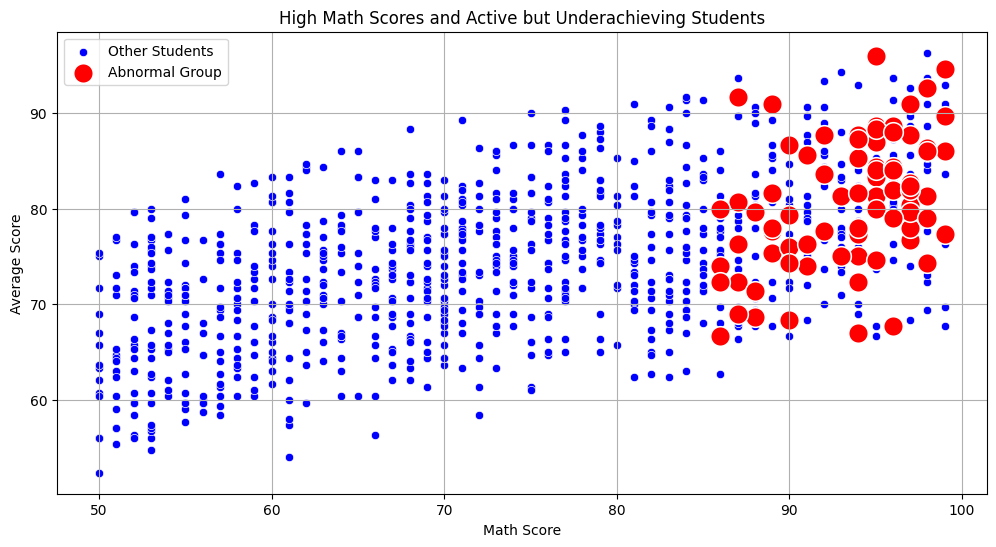